In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train_data = pd.read_csv('./labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


## 2. 데이터 분석
1. 데이터 크기
2. 데이터의 개수
3. 각 리뷰의 문자 길이 분포
4. 많이 사용된 단어
5. 긍정, 부정 데이터의 분포
6. 각 리뷰의 단어 개수 분포
7. 특주문자 및 대문자, 소문자 비율


### 2.1 데이터 크기

In [0]:
print("파일 크기 : ")
for file in os.listdir("./"):
  if 'tsv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize("./" + file) / 1000000, 2)) + 'MB')

파일 크기 : 
unlabeledTrainData.tsv        67.28MB
testData.tsv                  32.72MB
labeledTrainData.tsv          33.56MB


In [0]:
print("전체 학습 데이터의 개수 : {}".format(len(train_data)))

전체 학습 데이터의 개수 : 22585


In [0]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

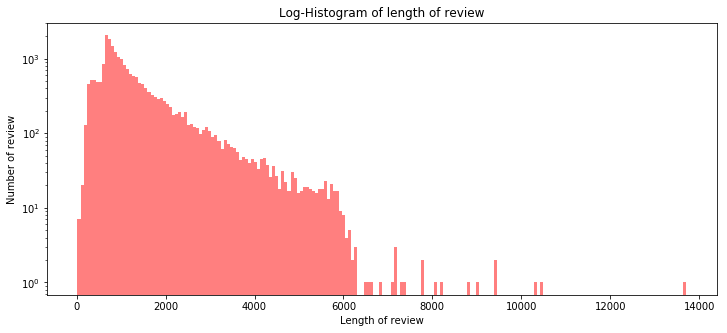

In [0]:
plt.figure(figsize=(12,5))

plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of length of review')

plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [0]:
print('리뷰 길이 최댓값 : {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값 : {}'.format(np.min(train_length)))
print('리뷰 길이 평균값 : {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))

print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값 : 13710
리뷰 길이 최솟값 : 17
리뷰 길이 평균값 : 1333.87
리뷰 길이 표준편차: 1010.05
리뷰 길이 중간값: 984.0
리뷰 길이 제1사분위: 706.0
리뷰 길이 제3사분위: 1623.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f1a1743a668>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1a1743aef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a173a6c18>],
 'means': [<matplotlib.lines.Line2D at 0x7f1a173a6908>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a173a65c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1a1743a860>,
  <matplotlib.lines.Line2D at 0x7f1a1743aba8>]}

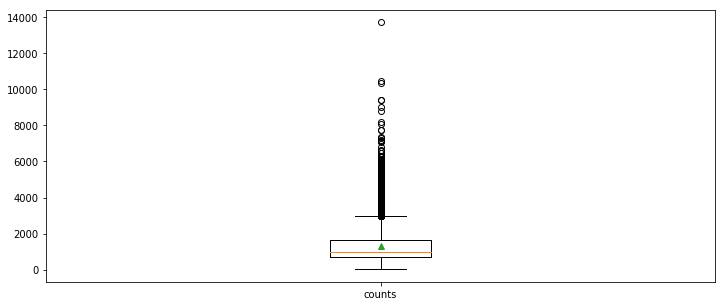

In [0]:
plt.figure(figsize=(12,5))

plt.boxplot(train_length, labels=['counts'], showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

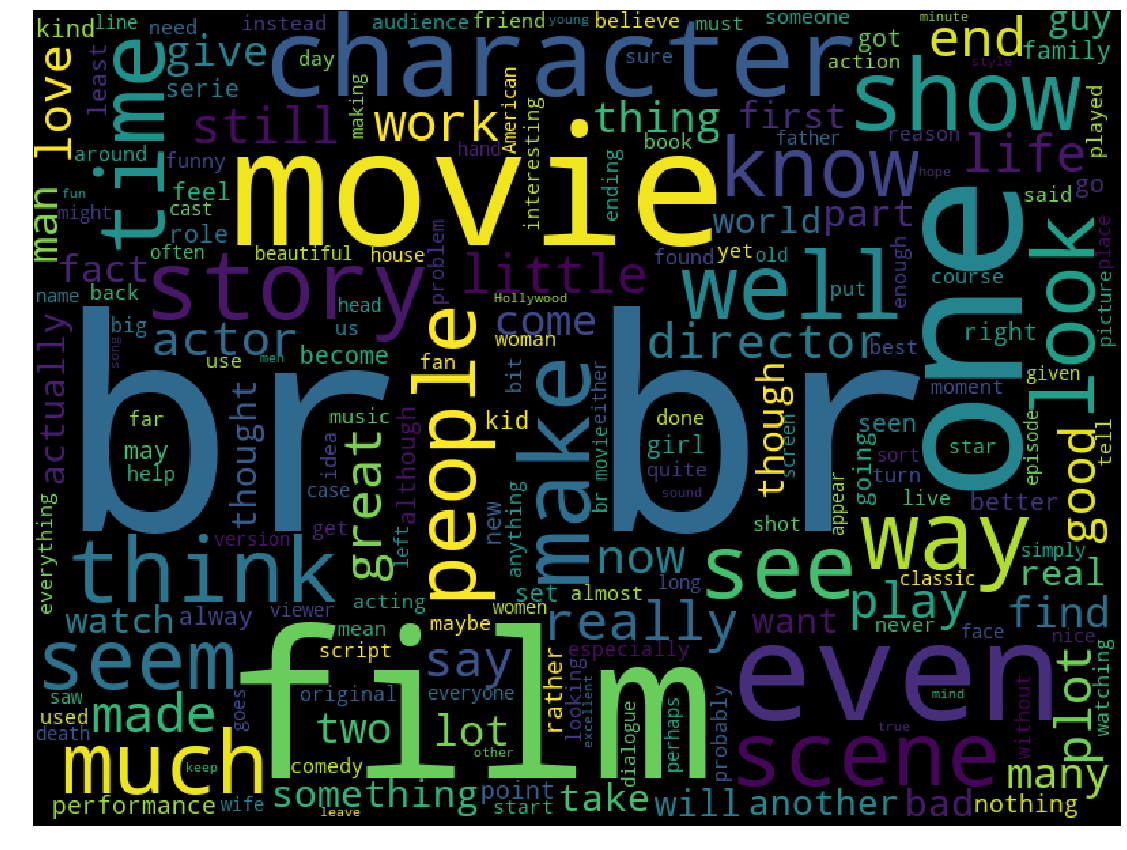

In [0]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

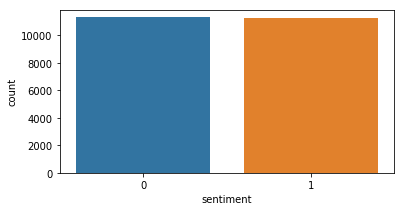

In [0]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [0]:
print('긍정 리뷰 개수 : {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 개수 : {}'.format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수 : 11287
부정 리뷰 개수 : 11298


Text(0, 0.5, 'Number of reviews')

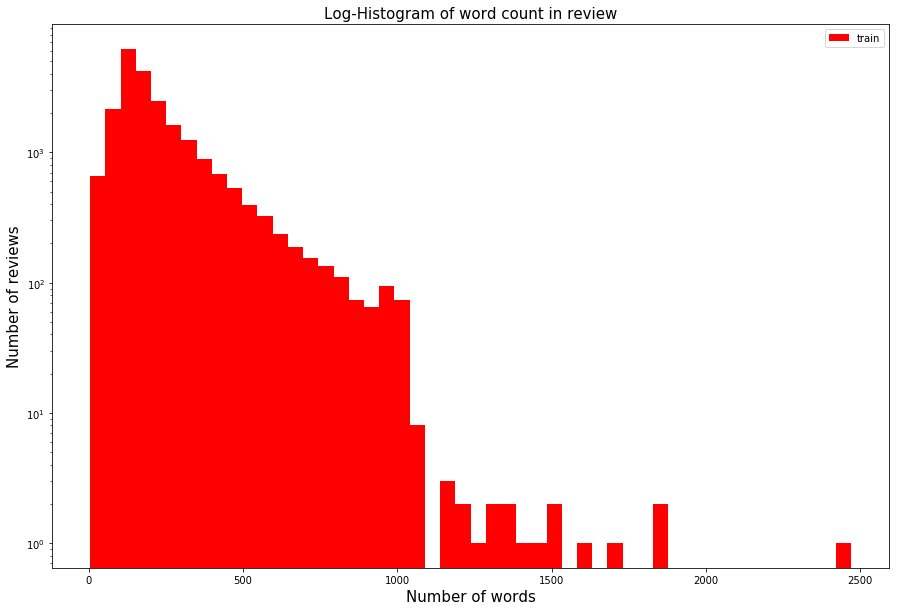

In [0]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [0]:
print('리뷰 단어 개수 최댓값 : {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값 : {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값 : {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))

print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값 : 2470
리뷰 단어 개수 최솟값 : 4
리뷰 단어 개수 평균값 : 234.48
리뷰 단어 개수 표준편차: 174.60
리뷰 단어 개수 중간값: 174.0
리뷰 길이 제1사분위: 127.0
리뷰 길이 제3사분위: 285.0


In [0]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))

capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))

numbers = np.mean(np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))))

print('물음표가 있는 질문 : {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 : {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 질문 : {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문 : {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문 : {:.2f}%'.format(numbers * 100))

물음표가 있는 질문 : 29.56%
마침표가 있는 : 99.69%
첫 글자가 대문자인 질문 : 0.00%
대문자가 있는 질문 : 99.62%
숫자가 있는 질문 : 56.68%


## 3. 데이터 전처리